In [2]:
get_ipython().magic('matplotlib inline')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')

data=pd.read_excel('caschool.xlsx.xls')

state=440232650+470353886+470352982 # sum of the student IDs for the members of the group

train = data.sample(frac=0.8, random_state=state) # For tasks 1-5 
test = data[data.index.isin(train.index)==False].copy() # Only for prediction (task 6)

train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

In [3]:
train.head()

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr
0,357,70995,Sonoma,Waugh Elementary,KK-06,734,36.000000,2.0243,12.820500,117,672.699951,0.159401,4920.777344,20.388889,16.955999,6.539509,676.099976,669.299988
1,15,72298,Tulare,Woodville Elementary,KK-08,649,36.000000,14.6379,76.271202,31,616.450012,0.047766,5621.456055,18.027779,9.630000,80.123260,611.900024,621.000000
2,60,72561,Ventura,Rio Elementary,KK-08,3074,142.550003,11.2898,66.194901,249,632.849976,0.081002,5034.290039,21.564363,11.592000,38.158752,633.200012,632.500000
3,259,72207,Tulare,Three Rivers Union Elementary,KK-08,248,11.120000,7.4627,21.268700,51,660.299988,0.205645,4302.834961,22.302158,15.365000,0.000000,667.799988,652.799988
4,246,63024,Humboldt,Scotia Union Elementary,KK-08,370,19.799999,6.5041,36.314400,56,658.349976,0.151351,4385.229492,18.686869,12.174000,0.540541,664.000000,652.700012


In [5]:
train.shape

(336, 18)

Exploratory Analysis of the dataset, focusing on Test Scores and Class Size

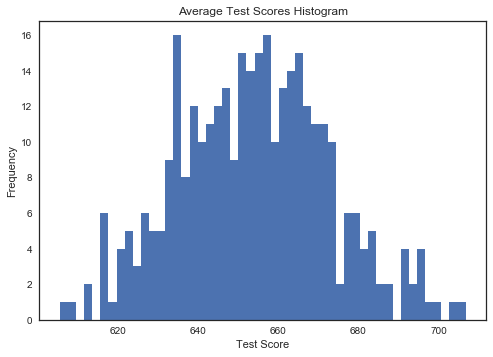

In [12]:
# histogram of average math and reading scores
plt.hist(train['testscr'], bins=50)
plt.title("Average Test Scores Histogram")
plt.xlabel("Test Score")
plt.ylabel("Frequency")
plt.show()

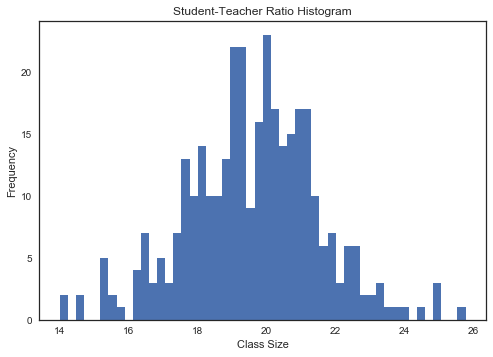

In [13]:
# histogram of student-teacher ratio
plt.hist(train['str'], bins=50)
plt.title("Student-Teacher Ratio Histogram")
plt.xlabel("Class Size")
plt.ylabel("Frequency")
plt.show()

In [32]:
train['testscr'].describe()

count    336.000000
mean     653.848066
std       18.985938
min      605.550049
25%      640.049988
50%      654.149963
75%      666.562531
max      706.750000
Name: testscr, dtype: float64

In [33]:
train['str'].describe()

count    336.000000
mean      19.620675
std        1.923371
min       14.000000
25%       18.328386
50%       19.747665
75%       20.892495
max       25.785124
Name: str, dtype: float64

In [34]:
from scipy import stats
stats.describe(train['testscr'])

DescribeResult(nobs=336L, minmax=(605.550048828125, 706.75), mean=653.84806642078217, variance=360.46585803814457, skewness=0.09446133275042438, kurtosis=-0.2328172060043765)

In [35]:
stats.describe(train['str'])

DescribeResult(nobs=336L, minmax=(14.0, 25.785123825073242), mean=19.620674928029377, variance=3.6993577764335788, skewness=-0.04252919936866217, kurtosis=0.47243693896490546)

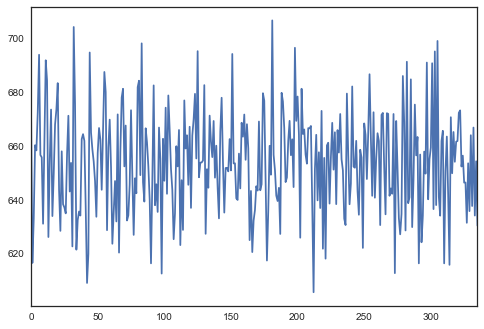

In [36]:
train['testscr'].plot()
plt.show()

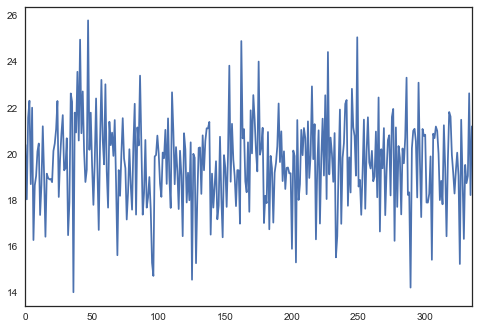

In [37]:
train['str'].plot()
plt.show()

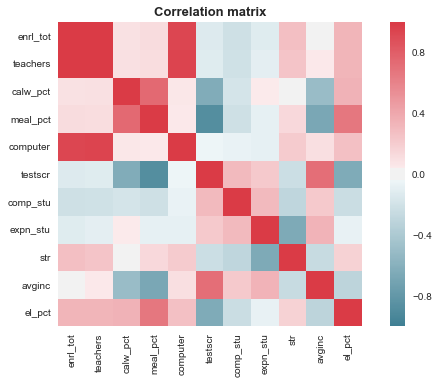

In [38]:
# correlation heat map between all relevant variables
fig, ax = plt.subplots()
variables=['enrl_tot','teachers','calw_pct', 'meal_pct', 'computer', 'testscr', 'comp_stu', 'expn_stu', 'str', 'avginc', 'el_pct']
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train[variables].corr(), vmax=1, vmin=-1, center=0, square=True, ax=ax, cmap=cmap)
ax.set_title('Correlation matrix', fontweight='bold', fontsize=13)
plt.tight_layout()
sns.plt.show()

In [39]:
# numerical correlation table
train[variables].corr().round(2)

,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct
enrl_tot,1.00,1.00,0.09,0.12,0.93,-0.13,-0.22,-0.12,0.28,0.04,0.33
teachers,1.00,1.00,0.10,0.12,0.94,-0.12,-0.21,-0.10,0.25,0.05,0.33
calw_pct,0.09,0.10,1.00,0.74,0.06,-0.64,-0.19,0.05,0.02,-0.50,0.35
meal_pct,0.12,0.12,0.74,1.00,0.05,-0.88,-0.22,-0.08,0.14,-0.67,0.66
computer,0.93,0.94,0.06,0.05,1.00,-0.04,-0.06,-0.08,0.21,0.11,0.27
testscr,-0.13,-0.12,-0.64,-0.88,-0.04,1.00,0.30,0.22,-0.23,0.71,-0.64
comp_stu,-0.22,-0.21,-0.19,-0.22,-0.06,0.30,1.00,0.30,-0.29,0.22,-0.24
expn_stu,-0.12,-0.10,0.05,-0.08,-0.08,0.22,0.30,1.00,-0.65,0.34,-0.08
str,0.28,0.25,0.02,0.14,0.21,-0.23,-0.29,-0.65,1.00,-0.25,0.18
avginc,0.04,0.05,-0.50,-0.67,0.11,0.71,0.22,0.34,-0.25,1.00,-0.31


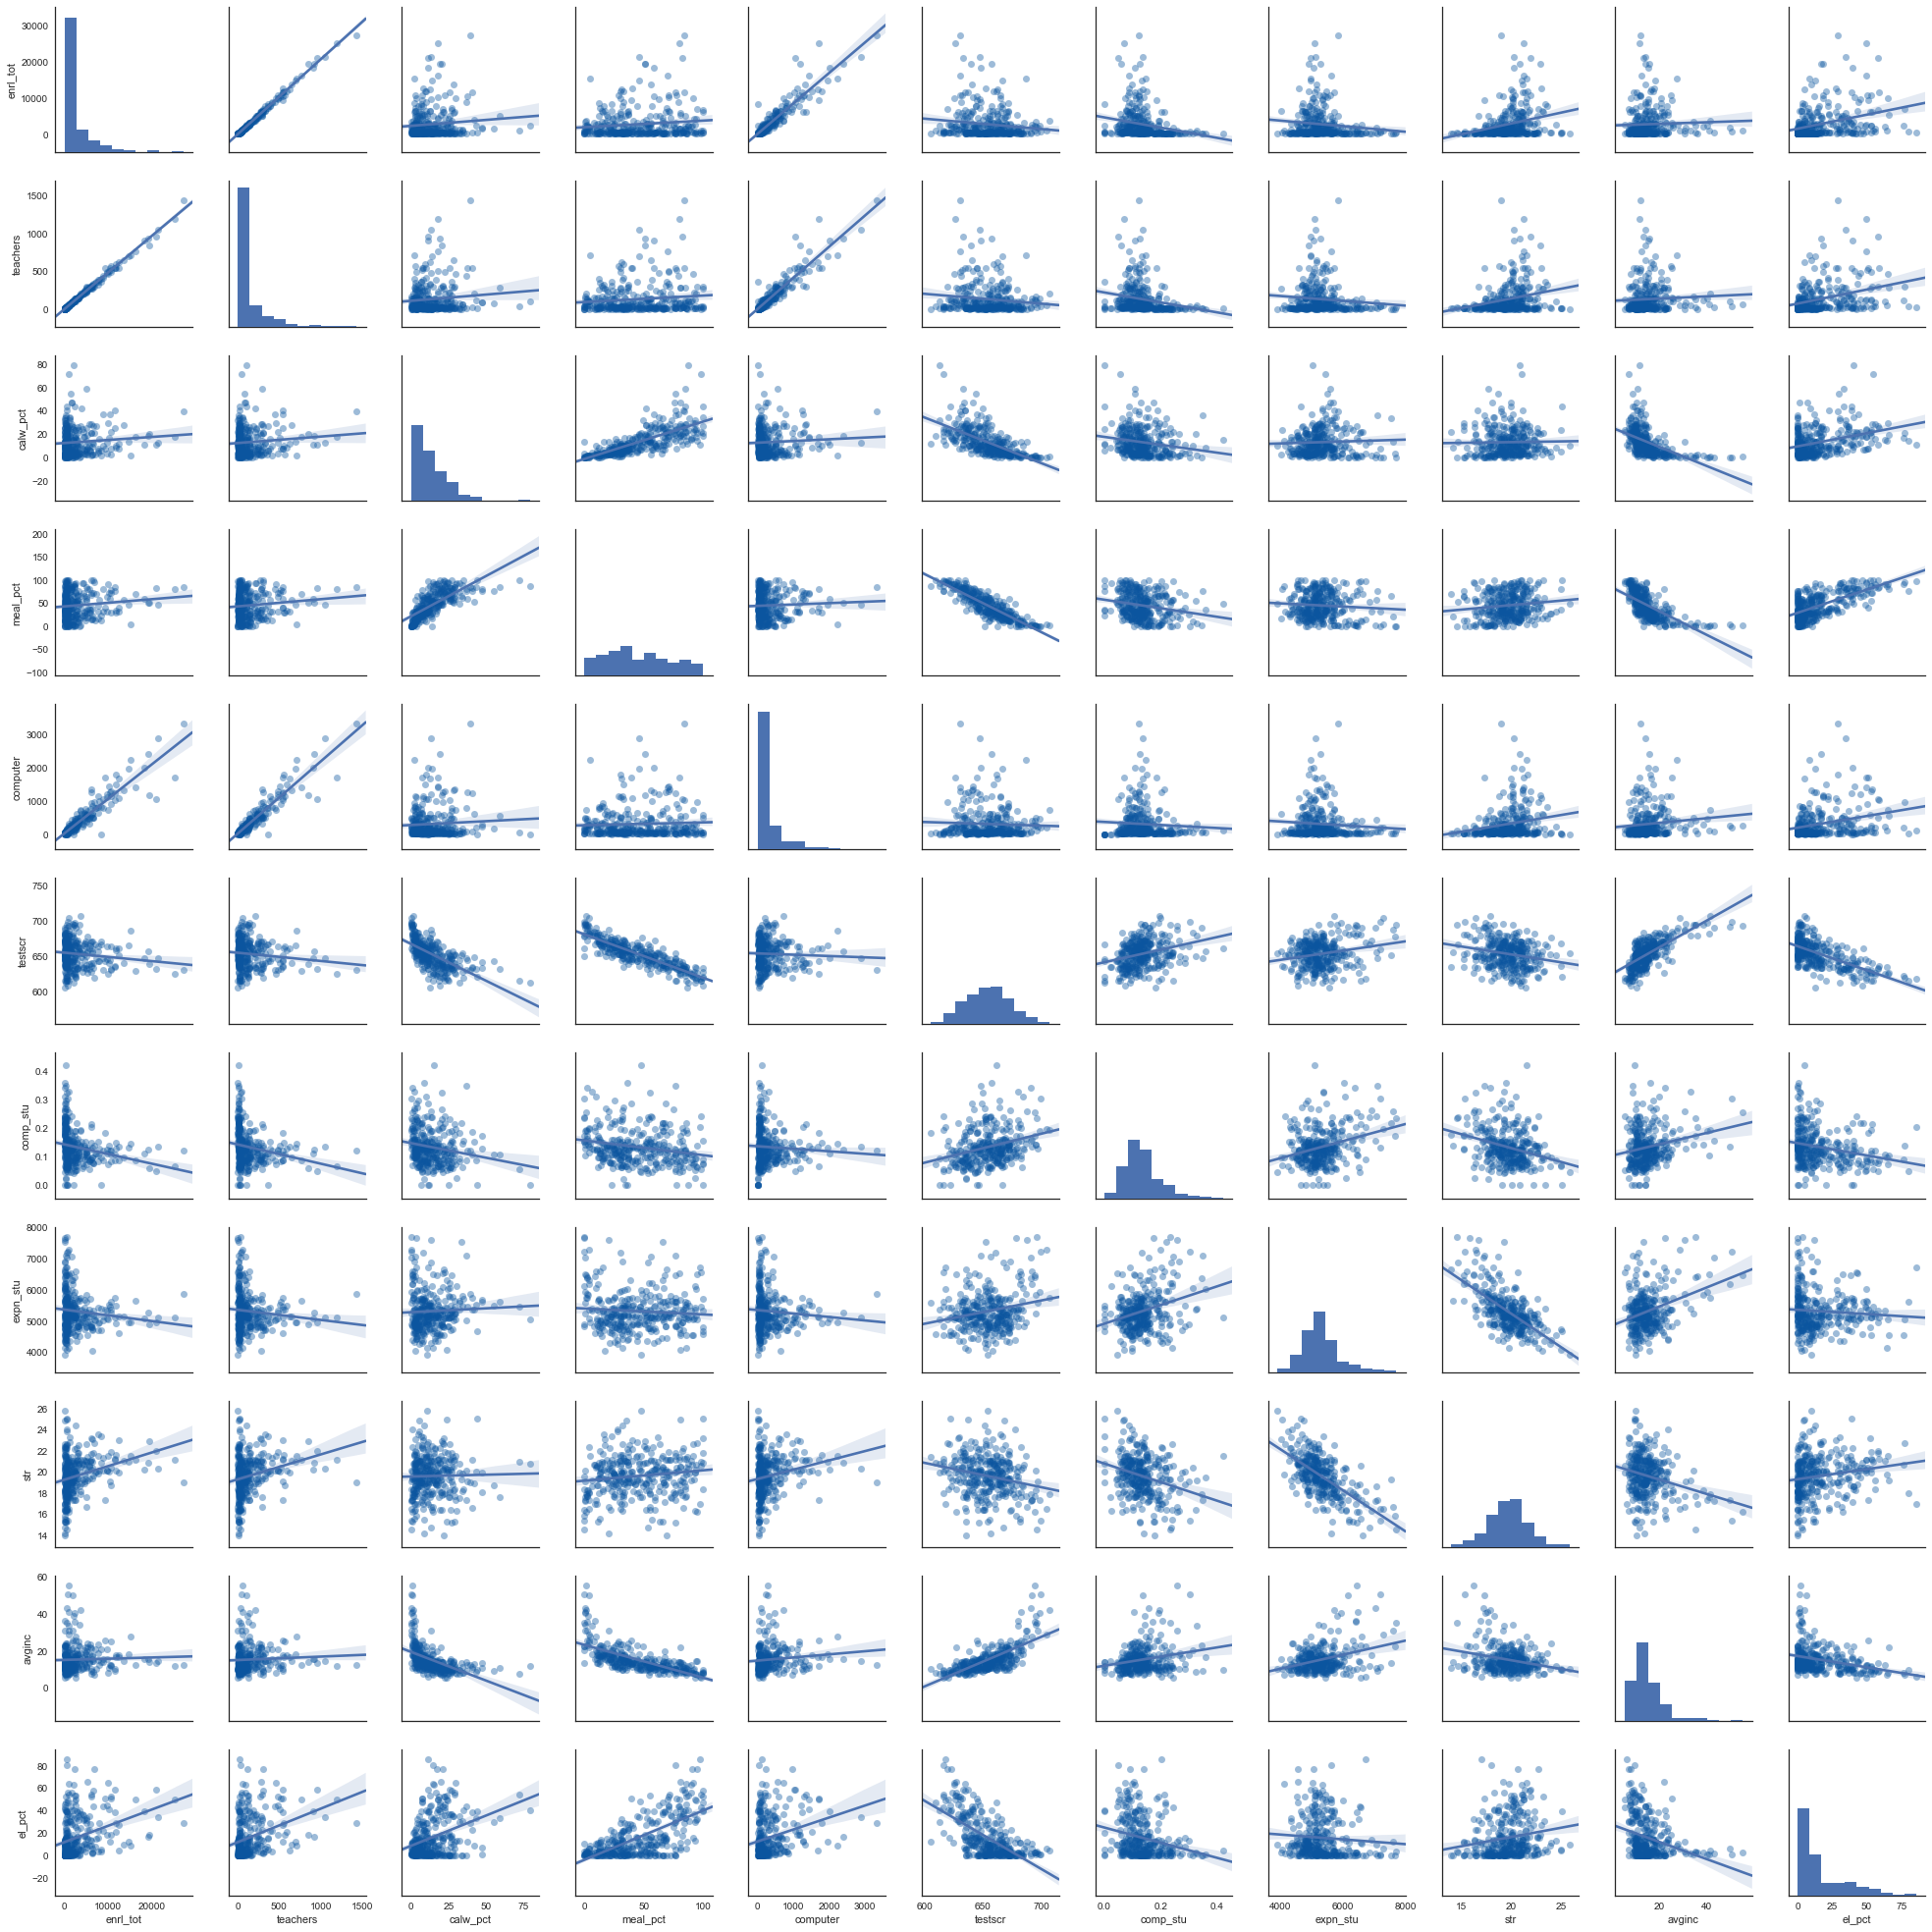

In [40]:
with sns.axes_style('white'):
    g=sns.pairplot(train[variables], kind='reg', 
                   plot_kws={'scatter_kws' :{'color': sns.color_palette('Blues')[-1], 'alpha': 0.4}})
sns.plt.tight_layout()
sns.plt.show()

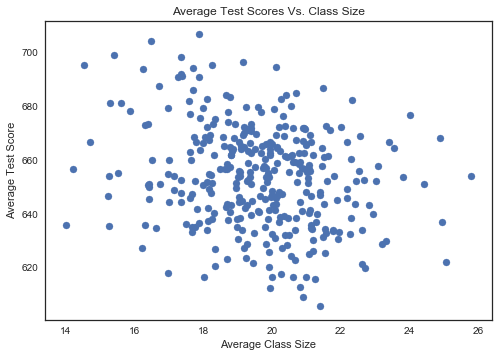

In [46]:
plt.scatter(train['str'],train['testscr'])
plt.title('Average Test Scores Vs. Class Size')
plt.ylabel('Average Test Score')
plt.xlabel('Average Class Size')
plt.show()

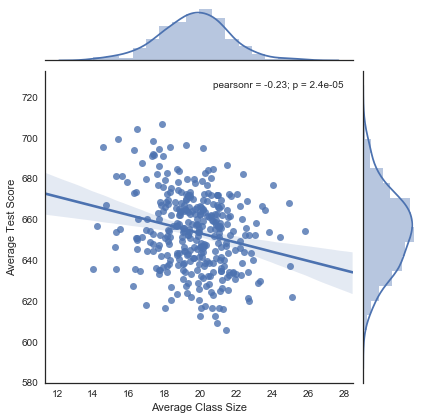

In [45]:
sns.jointplot(x=train['str'], y=train['testscr'], kind="reg")
plt.ylabel('Average Test Score')
plt.xlabel('Average Class Size')
plt.show()

C:\Users\sarah\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


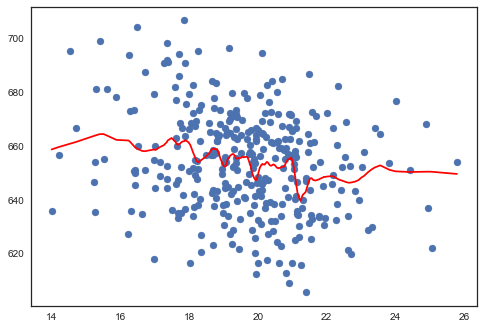

In [47]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
plt.scatter(train['str'],train['testscr'])
z1 = lowess(train['testscr'],train['str'], frac=1./10)
plt.plot(z1[:,0],z1[:,1],'red')
plt.show()